# Explore here

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
# pd.set_option('display.max_columns', None)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Paso 1 EDA

In [7]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No hay valores nulos para ninguna variable

In [9]:
# Comprobación de duplicados
df.duplicated().sum()

np.int64(1)

Hay 1 valor duplicado, lo eliminamos.

In [10]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info() # comprobacion de la eliminacion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Vamos a pasar la variable categoricas a numericas mediante factorizacion

In [13]:
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

In [15]:
df.drop(columns=['smoker', 'region','sex'], inplace=True)

In [16]:
df.head()

,age,bmi,children,charges,sex_n,smoker_n,region_n
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2


Normalizamos las variables

In [37]:
variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = variables)
df_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


# Paso 2: estudio la correlacion de las variables con el precio del seguro

# Regresión lineal múltiple

In [38]:
X = df_scal.drop("charges", axis = 1) # datos sin charge (variables predictoras)
y = df_scal["charges"] # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # División de los datos en train y test 80-20

selection_model = SelectKBest(f_regression, k = 4) # Elige las 4 variables con mas correlación con la variable objetio
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()] # Obtengo los nombres de las variables selccionadas por selectkBest
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


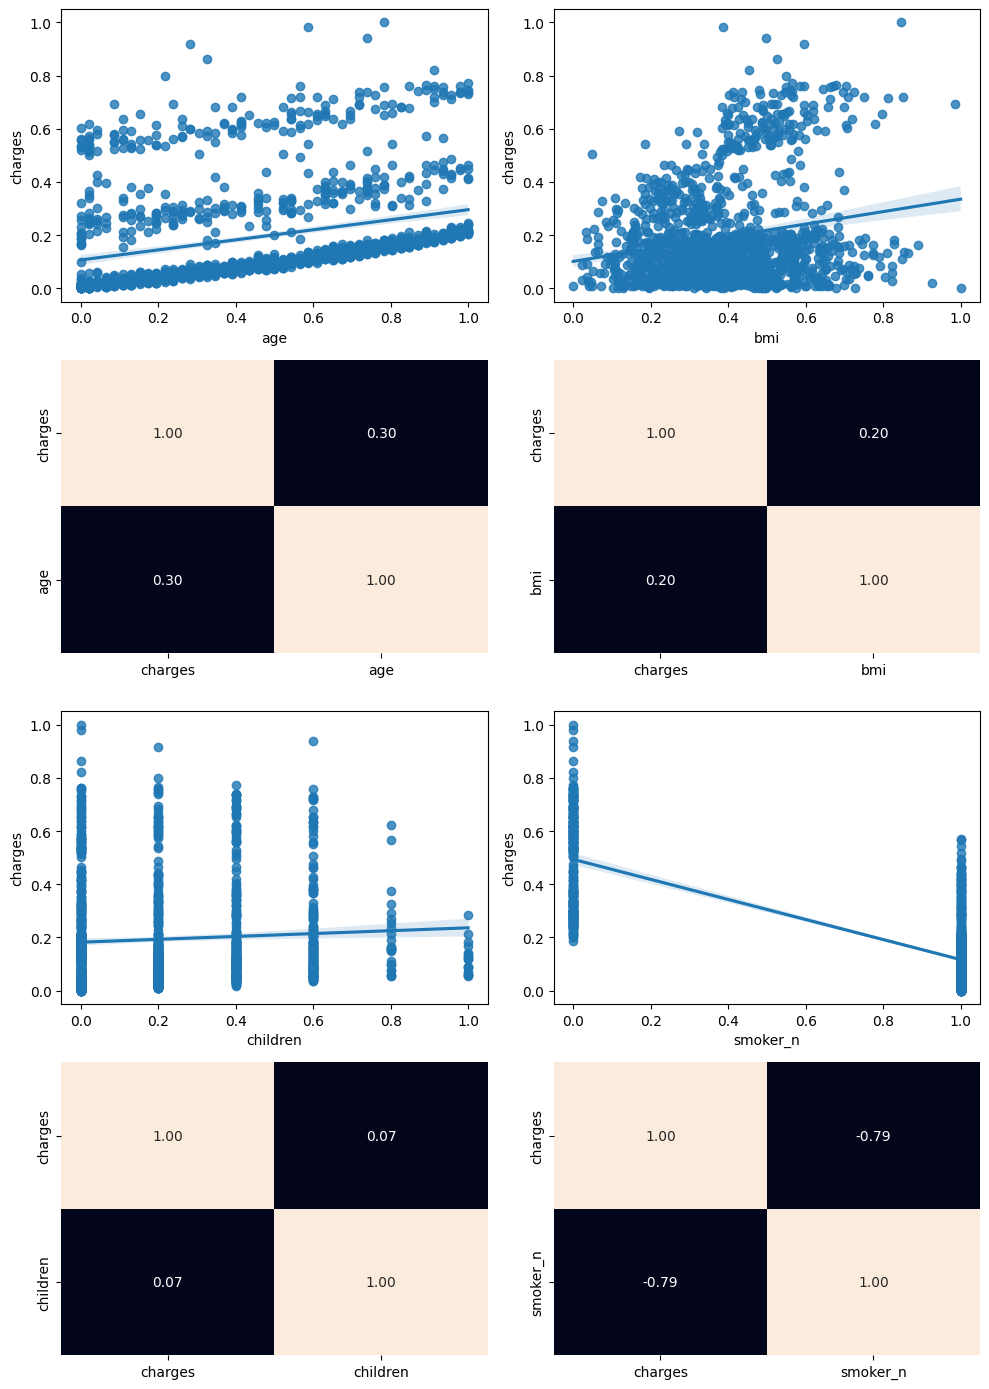

In [39]:


fig, axis = plt.subplots(4, 2, figsize = (10, 14))

sns.regplot(data = df_scal, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(df_scal[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = df_scal, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(df_scal[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = df_scal, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(df_scal[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = df_scal, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(df_scal[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

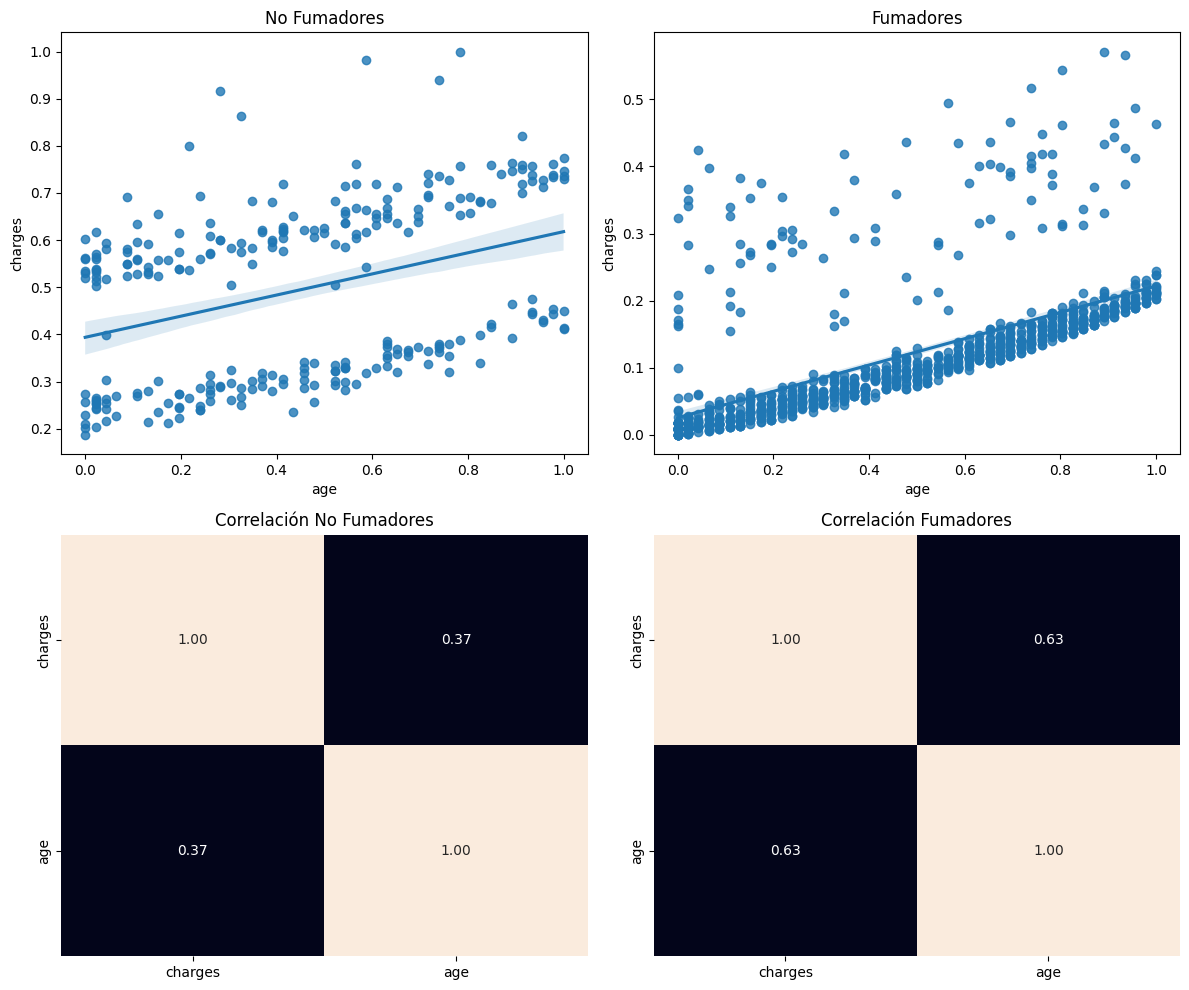

In [41]:
# Crear el grid para las gráficas
fig, axis = plt.subplots(2, 2, figsize=(12, 10))

#  no fumadores
sns.regplot(data = df_scal[df_scal["smoker_n"] == 0], x = "age", y = "charges", ax = axis[0, 0])
axis[0, 0].set_title('No Fumadores')

sns.heatmap(df_scal[df_scal["smoker_n"] == 0][["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
axis[1, 0].set_title('Correlación No Fumadores')


# fumadores
sns.regplot(data = df_scal[df_scal["smoker_n"] == 1], x = "age", y = "charges", ax = axis[0, 1])
axis[0, 1].set_title('Fumadores')

sns.heatmap(df_scal[df_scal["smoker_n"] == 1][["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
axis[1, 1].set_title('Correlación Fumadores')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

In [42]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)
# Esto es para guardas los datos ya procesados en csv

In [43]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

In [44]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

## Inicialización y entrenamiento del modelo

In [46]:
# Entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Coeficientes
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 0.3195827183308948
Coeficientes (b1, b2): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


## Predicción

In [48]:
y_pred = model.predict(X_test)
y_pred

array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

### Comprobación de la eficacia del modelo

In [50]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación (R^2): {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.009150574110331995
Coeficiente de determinación (R^2): 0.8045531086669289


Si tomamos el valor de R^2 observamos que es de un 80%, un valor alto, siginifica que el 80% de los datos están explicados por el modelo, por lo que se puede dar por satisfactorio.



### Prueba ejemplo clase

In [51]:

X = train_data[['bmi', 'age', 'smoker_n', 'children']]
X = sm.add_constant(X)
y = train_data['charges']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     716.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          5.56e-300
Time:                        23:12:05   Log-Likelihood:                 975.08
No. Observations:                1069   AIC:                            -1940.
Df Residuals:                    1064   BIC:                            -1915.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3196      0.011     30.080      0.0

In [52]:
residuos = results.resid

In [53]:
residuos

0       0.007013
1       0.005883
2       0.307105
3      -0.059001
4       0.001030
          ...   
1064    0.134059
1065   -0.109591
1066    0.015704
1067   -0.019519
1068   -0.058282
Length: 1069, dtype: float64

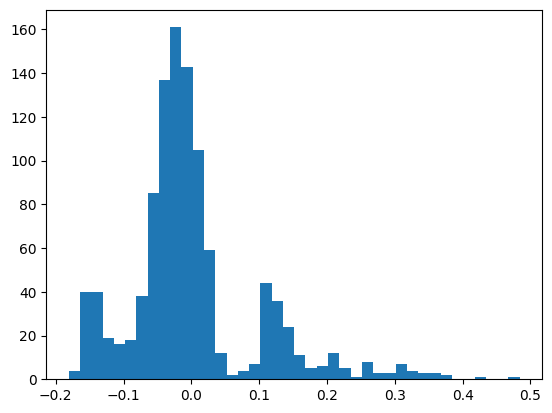

In [54]:
plt.hist(residuos, bins=40)
plt.show()

In [55]:
residuos.mean()

np.float64(-9.91619217878484e-16)

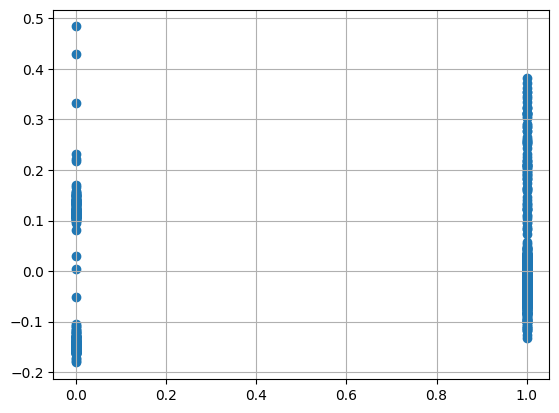

In [59]:
plt.scatter(train_data['smoker_n'], residuos)
plt.grid(True)